In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline



/Users/lauracollins/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Load the training data
col_names = ['deltaI', 'deltaR', 'avgPeak', 'avgWidth', 'avgProm']
peak_names = ['peak1', 'peak2', 'peak3', 'peak4', 'peak5']
locs_names = ['loc1', 'loc2', 'loc3', 'loc4', 'loc5']
width_names = ['width1', 'width2', 'width3','width4', 'width5']
prom_names = ['prom1', 'prom2', 'prom3', 'prom4', 'prom5']
col_names = col_names + peak_names + locs_names + width_names + prom_names

data = pd.read_csv('LineCutTrainingData051418.csv', header = None, names = col_names)

#The peak information columns have zeros when there weren't 5 peaks

data.head()

,deltaI,deltaR,avgPeak,avgWidth,avgProm,peak1,peak2,peak3,peak4,peak5,...,width1,width2,width3,width4,width5,prom1,prom2,prom3,prom4,prom5
0,0.81472,-0.147980,5.2376,0.017787,4.9919,8.8011,6.3141,5.0277,4.2308,3.7147,...,0.004366,0.008760,0.014187,0.020411,0.026567,8.5696,6.1381,4.8111,3.9784,3.4302
1,0.12699,-0.136070,2.6964,0.028479,2.0502,4.8072,3.3659,2.6933,2.3064,2.0581,...,0.006400,0.015034,0.024527,0.034571,0.044302,4.0741,3.0305,2.2895,1.8457,1.5491
2,0.63236,-1.417600,9.4789,0.010580,9.3400,17.1920,11.3730,9.0202,7.2687,6.3684,...,0.002534,0.005047,0.008062,0.012225,0.015909,17.0760,11.2750,8.8971,7.1230,6.2019
3,0.27850,-0.711760,10.2640,0.008488,10.1540,11.4840,13.2930,11.6750,9.5615,8.1874,...,0.003443,0.004523,0.006383,0.009193,0.012372,11.3760,13.2180,11.5810,9.4507,8.0602
4,0.95751,-0.055153,5.4478,0.017317,5.2103,9.5000,6.4023,5.1749,4.3685,3.8117,...,0.003987,0.008688,0.013858,0.019786,0.025924,9.2822,6.2320,4.9647,4.1231,3.5350


## Creating the training and testing sets

In [14]:
#Assigning the different columns to new dataframe names

#Target variables
Y1 = pd.DataFrame(data['deltaI']) #just delta I
Y2 = pd.DataFrame(data['deltaR']) # just delta R
Y3 = pd.DataFrame.join(Y1, Y2) # both deltas

#Indicator variables
X1 = data[col_names[2:]] #all variables
X2 = data[col_names[5:]] #not the average variables
X3 = data[col_names[2:5]] #just the average variables

#Splitting into train and test sets

#Random state
rs = 42
#Test size
ts1 = 0.3

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X1, Y1, test_size = ts1, random_state = rs)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X2, Y2, test_size = ts1, random_state = rs)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X3, Y3, test_size = ts1, random_state = rs)


## Making models

#### Using linear regression from scikit-learn with all variables 


Coefficients: 
               deltaI      deltaR
avgPeak    -0.070195    0.397363
avgWidth  124.071622  129.584566
avgProm     0.024801   -0.432314
peak1      -0.871793    0.503299
peak2      -4.364336   35.148653
peak3      23.599074  -64.327024
peak4      -4.900366   -5.069427
peak5     -21.891172    7.777064
loc1       41.115400  -74.790760
loc2       -2.138044  -59.987918
loc3        7.067450   19.303539
loc4        1.222247    3.232055
loc5       -1.726299   -4.577951
width1   -177.742203  237.395460
width2    -85.591629  145.263462
width3    -26.747357  -75.134850
width4     46.388105  137.039658
width5     69.562889   83.656211
prom1       0.865802   -0.495665
prom2       4.367755  -35.138877
prom3     -23.603863   64.323537
prom4       4.903153    5.082092
prom5      21.892536   -7.766884
Mean squared error: 0.029
Variance score: 0.766
Score on test set: 0.786


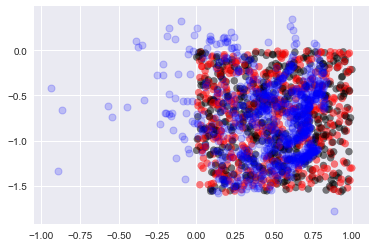

In [29]:
#Initialize and fit model to training data
reg = linear_model.LinearRegression()
reg1 = reg.fit(X_1_train, Y_3_train)

#Make predictions using the testing set
y_pred1 = reg1.predict(X_1_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg1.coef_.T, index = X1.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred1))

print('Score on test set: %.3f' % reg1.score(X_1_test, Y_3_test))

# Plot outputs
plt.scatter(Y_3_test['deltaI'], Y_3_test['deltaR'],  color=['black','red'], alpha = 0.5)
plt.scatter(y_pred1[:,0], y_pred1[:,1], color='blue', linewidth=1, alpha = 0.2)

#### Using linear regression from scikit-learn with non-average variables

Coefficients: 
             deltaI      deltaR
peak1    -0.741901    0.892310
peak2   -10.187392   50.635685
peak3    29.695740  -89.645666
peak4   -12.936964  -18.759167
peak5   -12.470571   30.787125
loc1     62.765582  -72.026334
loc2      1.805427  -65.635055
loc3      4.433252   26.651986
loc4      3.727135    0.194762
loc5     -3.170542   -4.828524
width1 -161.130862  246.958618
width2  -69.832641  186.506751
width3  -41.858887  -70.690421
width4   65.783503  199.864392
width5  102.061265   95.750462
prom1     0.727406   -0.889849
prom2    10.186138  -50.630958
prom3   -29.710006   89.640278
prom4    12.933811   18.768291
prom5    12.468669  -30.782600
Mean squared error: 0.039
Variance score: 0.685
Score on test set: 0.719


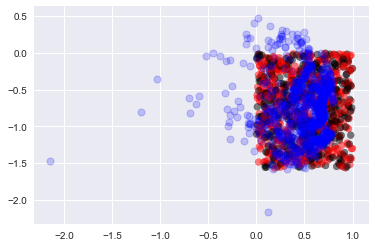

In [38]:
#Initialize and fit model to training data
reg2 = linear_model.LinearRegression()
reg2.fit(X_2_train, Y_3_train)

#Make predictions using the testing set
y_pred2 = reg2.predict(X_2_test)

# The coefficients
print('Coefficients: \n', pd.DataFrame(reg2.coef_.T, index = X2.columns , columns = Y3.columns))
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(Y_3_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(Y_3_test, y_pred2))

print('Score on test set: %.3f' % reg2.score(X_2_test, Y_3_test))

# Plot outputs
plt.scatter(Y_3_test['deltaI'], Y_3_test['deltaR'],  color=['black','red'], alpha = 0.5)
plt.scatter(y_pred2[:,0], y_pred2[:,1], color='blue', linewidth=1, alpha = 0.2)

In [32]:
y_pred2 = reg2.predict(X_2_test)
print(r2_score(Y_3_test, y_pred2))
#print(reg2.score(X_2_test, Y_3_test))


0.685343428305
0.718808415994


In [33]:
reg2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
reg2